# Introduction:
    Home loan approval dependent on factors like credit score, loan amount,lifestyle, and assets. Lenders assess applicant backgrounds to   evaluate eligibility, considering past repayment records of similar profiles. Meeting criteria, including timely payments, enhances the chances of loan approval.


# Problem statement:
    Develop a machine learning model for automated home loan prediction using applicant details, optimizing eligibility assessment and predicting likely approval based on factors like Gender, Marital Status, Education, Dependents, Income, Loan Amount, and Credit History.


# Objectives:
    i)predicting if the loan can be given to that person on the basis of various parameters like income, marital status, gender, etc. 

    ii)The prediction model not only helps the applicant but also helps the bank by minimizing the risk and reducing the number of defaulters


# Data preprocessing:
    1) Loan_ID: A unique loan ID 
    2) Gender: Either male or female 
    3) Married: Weather Married(yes) or Not Married(No) 
    4) Dependents: Number of persons depending on the client 
    5) Education: Applicant Education(Graduate or Undergraduate) 
    6) Self_Employed: Self-employed (Yes/No)
    7) ApplicantIncome: Applicant income 
    8) CoapplicantIncome: Co-applicant income 
    9) LoanAmount: Loan amount in thousands 
    10) Loan_Amount_Term: Terms of the loan in months 
    11) Credit_History: Credit history meets guidelines 
    12) Property_Area: Applicants are living either Urban, Semi-Urban or Rural 
    13) Loan_Status: Loan approved (Y/N) 


In [43]:
#Import the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
df = pd.read_csv("Train_Loan_Home.csv")
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [107]:
df.head()   # to check the first five rows.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [108]:
df.shape   # to get the shape of Data set.

(614, 13)

In [109]:
df.info()  # to get the structure  from the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [110]:
df.describe()  # to get the statistical data.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data cleaning and filling missing values.

In [111]:
df.apply(lambda x:sum(x.isnull()),axis=0) # checking missing value in each column in data set.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [112]:
df['Gender'].value_counts() # inputing the null value & To check categorical data

Male      489
Female    112
Name: Gender, dtype: int64

In [113]:
df['Married'].value_counts() # inputing the null value & To check categorical data

Yes    398
No     213
Name: Married, dtype: int64

In [114]:
df.Married=df.Married.fillna('Yes')

In [115]:
df['Dependents'].value_counts() # inputing the null value & To check categorical data

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [116]:
df.Dependents=df.Dependents.fillna('0')
df.Dependents

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [117]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [118]:
df.Self_Employed=df.Self_Employed.fillna('No')
df.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [119]:
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())
df.LoanAmount

0      146.412162
1      128.000000
2       66.000000
3      120.000000
4      141.000000
          ...    
609     71.000000
610     40.000000
611    253.000000
612    187.000000
613    133.000000
Name: LoanAmount, Length: 614, dtype: float64

In [120]:
df['Loan_Amount_Term'].value_counts() # inputing the null value & To check Numerical data

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [121]:
df.Loan_Amount_Term=df.Loan_Amount_Term.fillna(360.0) # inputing the null value & To check Numerical data
df.Loan_Amount_Term

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
       ...  
609    360.0
610    180.0
611    360.0
612    360.0
613    360.0
Name: Loan_Amount_Term, Length: 614, dtype: float64

In [122]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [123]:
df.Credit_History=df.Credit_History.fillna(1.0) 
df.Credit_History

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

In [124]:
df.apply(lambda x:sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [125]:
# spliting training data
x= df.iloc[:,1:12].values
y= df.iloc[:,12].values

In [126]:
x

array([['Male', 'No', '0', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ...,
       ['Male', 'Yes', '1', ..., 360.0, 1.0, 'Urban'],
       ['Male', 'Yes', '2', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'No', '0', ..., 360.0, 0.0, 'Semiurban']], dtype=object)

In [127]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [128]:
# splitting the dataset info the traiing set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=1/3,random_state=0)

In [129]:
x_train

array([['Male', 'Yes', '3+', ..., 360.0, 1.0, 'Rural'],
       [nan, 'Yes', '0', ..., 360.0, 1.0, 'Rural'],
       ['Male', 'Yes', '3+', ..., 180.0, 1.0, 'Rural'],
       ...,
       ['Male', 'Yes', '3+', ..., 360.0, 1.0, 'Semiurban'],
       ['Male', 'Yes', '0', ..., 360.0, 1.0, 'Urban'],
       ['Female', 'Yes', '0', ..., 360.0, 1.0, 'Semiurban']], dtype=object)

In [130]:
# Dropping Loan_ID column 
df.drop(['Loan_ID'],axis=1,inplace=True)


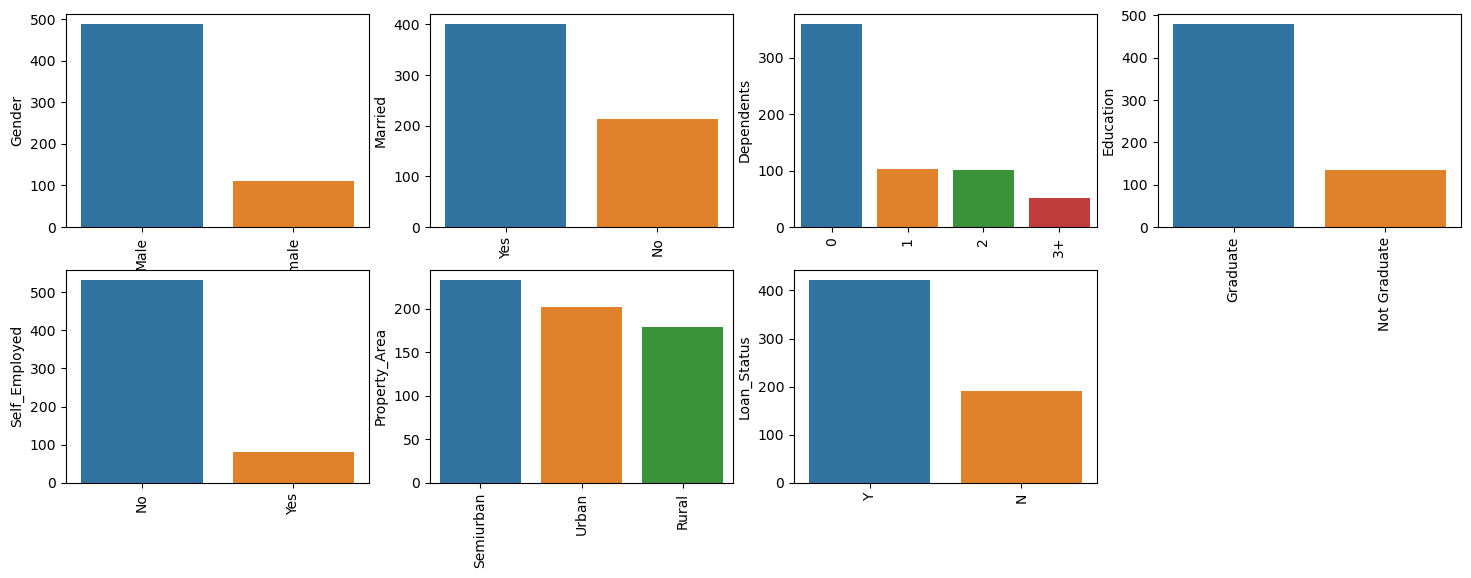

In [131]:
obj = (df.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols: 
    y = df[col].value_counts() 
    plt.subplot(11,4,index) 
    plt.xticks(rotation=90) 
    sns.barplot(x=list(y.index), y=y) 
    index +=1

In [132]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how 
# to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
obj = (df.dtypes == 'object') 
for col in list(obj[obj].index): 
     df[col] = label_encoder.fit_transform(df[col])


In [133]:
# To find the number of columns with 
# datatype==object 
obj = (df.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


Categorical variables: 0


<AxesSubplot:>

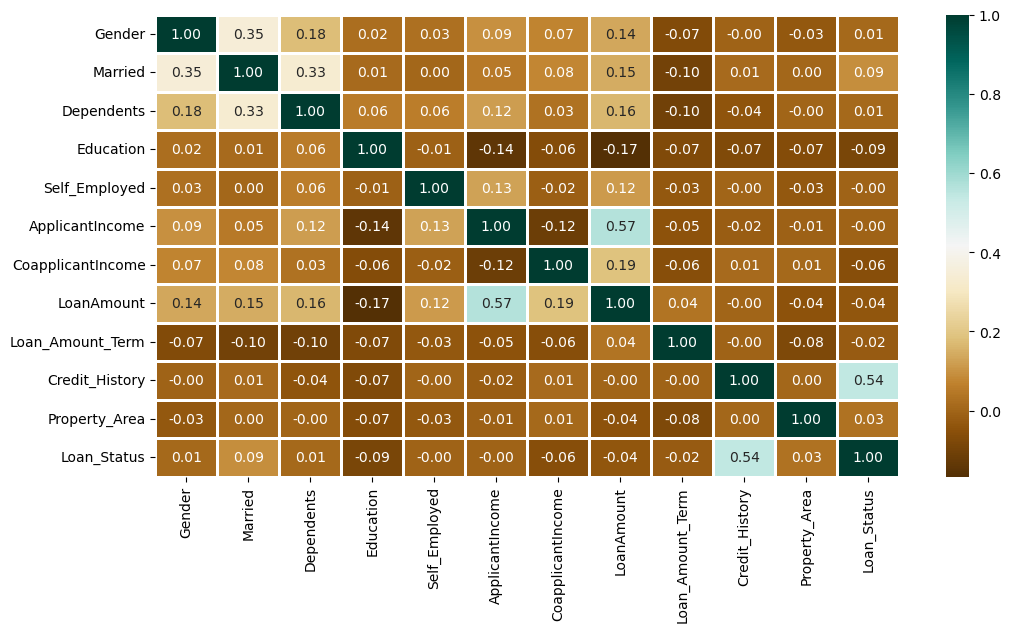

In [134]:
plt.figure(figsize=(12,6)) 

sns.heatmap(df.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

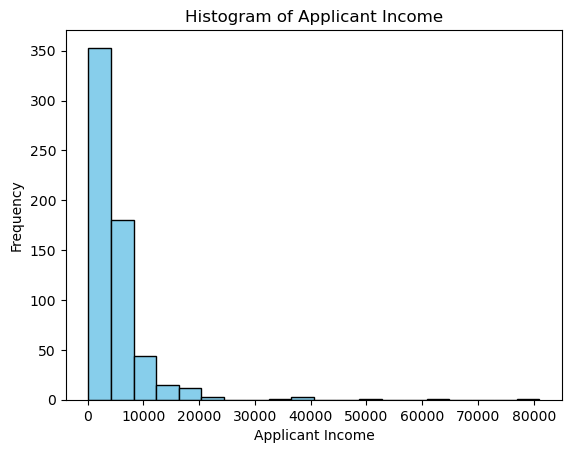

In [135]:
# Look at the distribution of loan amounts with a histogram.
applicant_income = df['ApplicantIncome']

# Create a histogram
plt.hist(applicant_income, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income')

# Show the plot
plt.show()


# create a box plot:-

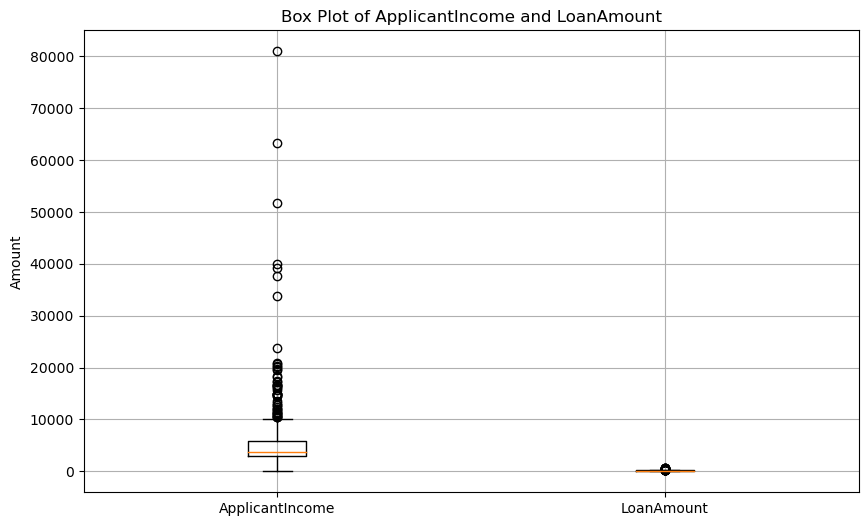

In [136]:

plt.figure(figsize=(10, 6))
plt.boxplot([df['ApplicantIncome'], df['LoanAmount']], labels=['ApplicantIncome', 'LoanAmount'])
plt.title('Box Plot of ApplicantIncome and LoanAmount')
plt.ylabel('Amount')
plt.grid(True)
plt.show()


# Scatter plot

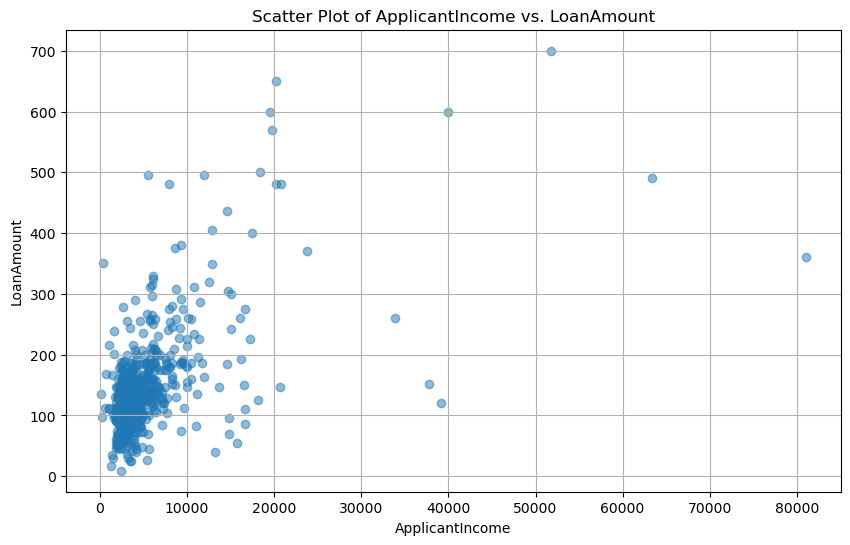

In [149]:
plt.figure(figsize=(10, 6))
plt.scatter(df['ApplicantIncome'], df['LoanAmount'], alpha=0.5)
plt.title('Scatter Plot of ApplicantIncome vs. LoanAmount')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.grid(True)
plt.show()

# Logistic Regression:-

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [151]:
# Define features (X) and target variable (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']


In [152]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)


In [153]:
# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [154]:
# Make predictions on the test set
predictions = model.predict(X_test)

In [155]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.79


In [156]:
# Display classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [157]:
# Make predictions on the test set
predictions_train = model.predict(X_train)

In [158]:
accuracy1 = accuracy_score(y_train, predictions_train)
print(f'Accuracy: {accuracy1:.2f}')


Accuracy: 0.82


In [159]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


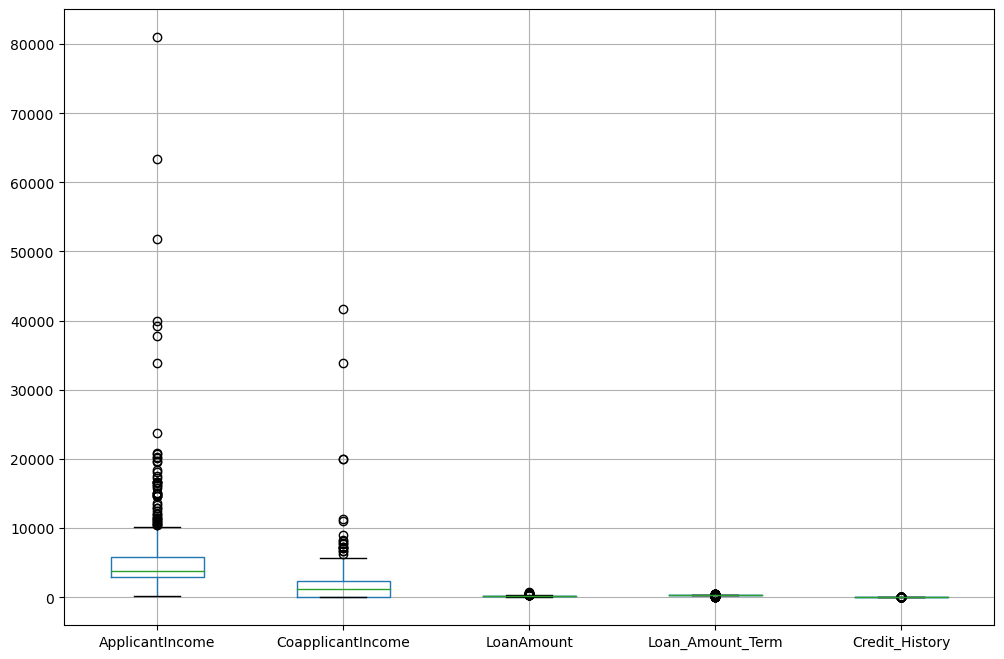

Original Dataset: (614, 13)
Dataset without Outliers (Z-score): (0, 13)
Dataset without Outliers (IQR): (398, 13)


In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load your dataset
data = pd.read_csv('Train_Loan_Home.csv')

# Display basic statistics of numerical columns
print(data.describe())

# Visualize boxplots to identify potential outliers
data.boxplot(figsize=(12, 8))
plt.show()

# Detect and handle outliers using Z-score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
threshold = 3
outliers = np.where(z_scores > threshold)

# Remove outliers
data_no_outliers_zscore = data[(z_scores < threshold).all(axis=1)]

# Alternatively, you can handle outliers using IQR method
Q1 = data.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = data.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = ((data.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | (data.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

# Remove outliers
data_no_outliers_iqr = data[~outliers_iqr.any(axis=1)]

# Compare the sizes of the datasets before and after removing outliers
print(f"Original Dataset: {data.shape}")
print(f"Dataset without Outliers (Z-score): {data_no_outliers_zscore.shape}")
print(f"Dataset without Outliers (IQR): {data_no_outliers_iqr.shape}")
